In [1]:
%run 'ks25_Read_epistasis.ipynb'

Running notebook 'ks01_Data_import.ipynb'...



/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)



Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Reading precalculated epistasis...
/Users/karen/HIS3InterspeciesEpistasis/Analysis/Karen/files_dump/epistasis_in_foursomes/



Variables: 

- ep_dict: a dictionary, Keys are tuples (mutA, mutB) and values are pandas.Series of epistasis between mutA and mutB in all backgrounds. 
Tuples (mutA, mutB) are sorted by aa_position.

- get_ep_summary: a function that takes ep_dict as an argument and applies an arbitrary function to every pd.Series object. For example, ep_summary = get_ep_summary(ep_dict, np.mean)

- get_ep_summary_by_positions: a function that uses get_ep_summary and then averages results by position_pair. For example, get_ep_summary_by_positions(ep_dict, np.max, np.mean) will apply np.max to epistasis series and then us

In [5]:
%run 'ks20_Read_ddG.ipynb'


Variables: 

- positions:			a pandas.DataFrame with information about position numbers, segments etc
- get_segment_of_a_genotype:	a function that return the segment of genotype (the most likely segment
				because sometimes it's not possible to say for sure)


Variables: 
- predicted_ddG:		Pandas DataFrame with all calculated ddG (single, double and triple mutants (?)),
- predicted_doubles:		doubles only (Pandas DataFrame),
- predicted_singles:		singles only (Pandas DataFrame),
- get_ddG:			function that returns predicted ddG for a genotype
- by_position_mean_ddG:		mean ddG value at each position,
- by_position_var_ddG:		variance of predicted ddG at each position.



In [58]:
from scipy import stats

931 54702
941 54702
835 54702
845 54702


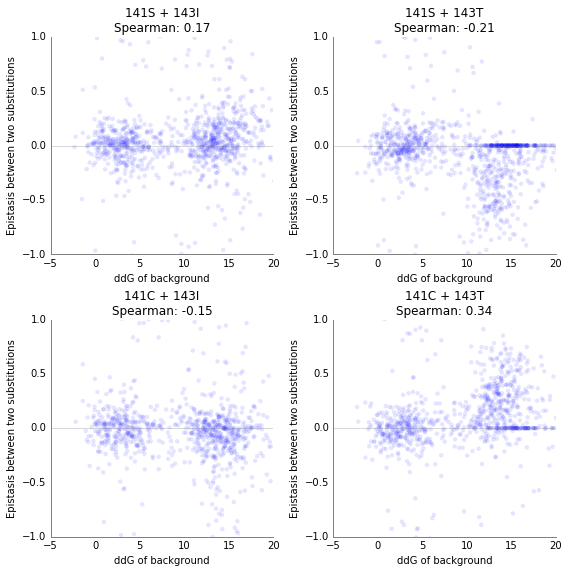

In [69]:
plot_better(width=8, height=8)
for index, k in enumerate([('141S', '143I'), ('141S', '143T'), ('141C', '143I'),  ('141C', '143T')]):
    ax = plt.subplot(2, 2, index+1)
    improve_plot(ax, grid='')
    ep = pd.DataFrame(ep_dict[k])
    ep.columns = ['epistasis']
    merged = predicted_ddG.merge(ep, how='inner', left_index=True, right_index=True)

    plt.scatter(merged.ddG, merged.epistasis, edgecolor='none', alpha=0.1, label=k)
    print len(merged), len(predicted_ddG)
    plt.title(str(k[0]) + ' + ' + str(k[1]) + '\nSpearman: %.2f' %(stats.spearmanr(merged.ddG, merged.epistasis)[0]))
    plt.xlabel('ddG of background')
    plt.ylabel('Epistasis between two substitutions')
    plt.ylim(-1,1)
    plt.axhline(0, color='gray', alpha=0.3)
    plt.xlim(-5,20)
plt.tight_layout()